Las t칠cnicas de clustering, tambi칠n conocidas como t칠cnicas de agrupamiento, son un conjunto de m칠todos de aprendizaje **no supervisado** que se utilizan para identificar patrones naturales o estructuras ocultas en conjuntos de datos. La idea principal detr치s del *clustering* es agrupar elementos similares en conjuntos o cl칰steres y separar elementos diferentes en cl칰steres diferentes. Estas t칠cnicas son 칰tiles para una variedad de aplicaciones en varios sectores debido a su capacidad para descubrir relaciones intr칤nsecas en los datos. Aqu칤 te explico en qu칠 consisten y c칩mo se utilizan, junto con un ejemplo real en un sector espec칤fico:

1. **K-Means:** El algoritmo K-Means es uno de los m칠todos de clustering m치s populares y el que aprenderemos en esta lecci칩n. Agrupa los datos en un n칰mero predefinido de cl칰steres (k) seg칰n la distancia entre los puntos de datos. Los datos se asignan al cl칰ster cuyo centroide (punto central) est치 m치s cerca de ellos. Es especialmente 칰til cuando se necesita segmentar datos en grupos de manera equitativa y r치pida.

![Alt text](image-3.png)

   **Ejemplo:** Se utiliza en marketing para segmentar a los clientes en grupos con intereses similares. Esto permite dirigir campa침as de marketing espec칤ficas a cada segmento y mejorar la personalizaci칩n de los mensajes.

2. **Agrupamiento jer치rquico:** Este m칠todo crea una jerarqu칤a de cl칰steres en forma de un 치rbol. Los datos se agrupan primero en cl칰steres m치s peque침os y luego se fusionan gradualmente en cl칰steres m치s grandes. Esto permite explorar diferentes niveles de granularidad en los agrupamientos.

![Alt text](image-1.png)

   **Ejemplo:** En biolog칤a, se puede utilizar el agrupamiento jer치rquico para clasificar especies en funci칩n de similitudes gen칠ticas. Se obtiene una jerarqu칤a de agrupamientos que muestra c칩mo las especies se relacionan entre s칤 en diferentes niveles de similitud.

3. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise):** Este algoritmo se basa en la densidad de puntos en el espacio de datos y agrupa puntos que est치n cerca unos de otros en regiones densas, separando regiones menos densas. Es efectivo para identificar cl칰steres de formas arbitrarias y detectar valores at칤picos.

![Alt text](image.png)

   **Ejemplo:** En an치lisis de datos de tr치fico urbano, se utiliza para identificar 치reas de congesti칩n en una ciudad. Los puntos de datos representar칤an veh칤culos, y el algoritmo identificar칤a cl칰steres de veh칤culos que se mueven lentamente debido a la congesti칩n del tr치fico.

4. **Clustering espectral:** Este enfoque utiliza la teor칤a de grafos y el an치lisis de matrices para agrupar datos en funci칩n de similitudes en la estructura de los datos. Puede ser 칰til para identificar cl칰steres en datos de alta dimensionalidad.


![Alt text](image-4.png)


   **Ejemplo:** En procesamiento de im치genes, se puede aplicar clustering espectral para segmentar una imagen en regiones con caracter칤sticas similares, como en la segmentaci칩n de tejidos en im치genes m칠dicas.

Otros ejemplos son: 

Clustering se utiliza ampliamente en el mundo de la ciencia de datos y el an치lisis de datos para identificar patrones, segmentar datos y tomar decisiones informadas. Aqu칤 tienes algunos ejemplos de la vida real de clustering en el campo de la ciencia de datos:

-  **Recomendaciones de productos:** Las plataformas de comercio electr칩nico como Amazon y Netflix utilizan algoritmos de clustering para recomendar productos o contenido a los usuarios en funci칩n de sus comportamientos y preferencias pasadas. Si un usuario ha comprado ciertos libros o visto pel칤culas de cierto g칠nero, el sistema puede agruparlo con otros usuarios que tienen patrones de compra o visualizaci칩n similares y recomendar productos populares en ese grupo.

-  **Detecci칩n de fraudes:** En la industria financiera, el clustering se utiliza para detectar transacciones fraudulentas. Los patrones de gasto fraudulentos a menudo son diferentes de los patrones de gasto leg칤timos, y el clustering puede ayudar a identificar grupos de transacciones sospechosas que requieren una revisi칩n adicional.

- **An치lisis de redes sociales:** Las redes sociales utilizan clustering para agrupar a los usuarios en funci칩n de sus intereses, conexiones o comportamientos en l칤nea. Esto permite a las plataformas mostrar contenido relevante en el feed de noticias de un usuario y sugerir amigos o conexiones con intereses similares.

-  **Diagn칩stico m칠dico:** En medicina, el clustering se utiliza para identificar grupos de pacientes con caracter칤sticas m칠dicas similares. Esto puede ser 칰til para personalizar tratamientos y predecir resultados en funci칩n de la similitud de los casos.

- **Segmentaci칩n geogr치fica:** Las empresas de venta al por menor o servicios pueden utilizar clustering para segmentar 치reas geogr치ficas en funci칩n de patrones de compra o comportamiento del consumidor. Esto puede guiar las estrategias de expansi칩n de negocios y la asignaci칩n de recursos.

-  **Optimizaci칩n de rutas de entrega:** Las empresas de log칤stica utilizan clustering para optimizar las rutas de entrega. Los destinos cercanos se agrupan en rutas eficientes, lo que reduce los costos de transporte y el tiempo de entrega.


In [20]:
# antes de empezar necesitar칠is las siguientes librer칤as
#!pip install yellowbrick
#!pip install data-science-utils==1.7.0

In [2]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gr치ficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d


# Preprocesado y modelado
# ==============================================================================
from sklearn.preprocessing import StandardScaler


#from sklearn import metrics
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Calidad de los clusters
# ==============================================================================
from ds_utils.unsupervised import plot_cluster_cardinality, plot_cluster_magnitude, plot_magnitude_vs_cardinality
from scipy.spatial.distance import euclidean

# Configuraci칩n warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

El conjunto de datos que usaremos para la lecci칩n de hoy contiene informaci칩n sobre clientes  y sus caracter칤sticas demogr치ficas y de comportamiento relacionadas con compras o gastos. Aqu칤 est치 una descripci칩n de las columnas:

1. **Gender (G칠nero):** Esta columna indica el g칠nero de cada cliente o individuo. Puede tomar dos valores posibles: "Male" (Hombre) o "Female" (Mujer). Esto se refiere al g칠nero de cada persona en el conjunto de datos.

2. **Age (Edad):** Esta columna muestra la edad de cada cliente o individuo en a침os. Por ejemplo, el primer cliente tiene 19 a침os, el segundo tiene 21 a침os, y as칤 sucesivamente.

3. **Annual Income (k$) (Ingreso Anual en miles de d칩lares):** Esta columna representa el ingreso anual de cada cliente en miles de d칩lares. Indica cu치nto dinero ganan anualmente. Por ejemplo, el primer cliente tiene un ingreso anual de 15,000 d칩lares, el segundo tiene 15,000 d칩lares, y as칤 sucesivamente.

4. **Spending Score (1-100) (Puntuaci칩n de Gasto, de 1 a 100):** Esta columna muestra una puntuaci칩n de gasto que asigna un valor entre 1 y 100 a cada cliente. Esta puntuaci칩n podr칤a estar relacionada con el comportamiento de gasto de los clientes, donde un puntaje m치s alto indica un gasto m치s alto o un mayor nivel de compra. Por ejemplo, el primer cliente tiene un puntaje de gasto de 39, el segundo tiene un puntaje de 81, y as칤 sucesivamente.


In [3]:
df = pd.read_csv("data/Mall_Customers.csv", index_col = 0)
df.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)
CustomerID                                                         
1             Male   19                  15                      39
2             Male   21                  15                      81
3           Female   20                  16                       6
4           Female   23                  16                      77
5           Female   31                  17                      40

In [4]:
# vamos a hacer una copia del DataFrame ya que vamos a hacerle algunas modificaciones
df_copia = df.copy()
df_copia.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)
CustomerID                                                         
1             Male   19                  15                      39
2             Male   21                  15                      81
3           Female   20                  16                       6
4           Female   23                  16                      77
5           Female   31                  17                      40

# Exploraci칩n y Preprocesamiento del dataset

Antes de aplicar un algoritmo de K-Means, es esencial realizar una exploraci칩n de datos exhaustiva (EDA, por sus siglas en ingl칠s: Exploratory Data Analysis) y llevar a cabo procesos de limpieza de datos. Estos pasos son cr칤ticos para garantizar la calidad de los resultados de tu modelo y asegurarte de que los datos sean adecuados para el algoritmo. Aqu칤 est치n las razones y las tareas t칤picas que debes realizar durante el EDA y la limpieza de datos:

**Razones para realizar EDA y limpieza de datos:**

1. **Identificar valores at칤picos:** El EDA te permite detectar valores at칤picos (outliers) que pueden afectar negativamente el rendimiento del algoritmo de K-Means. Los valores at칤picos pueden influir en la ubicaci칩n de los centroides y distorsionar los resultados del clustering.

2. **Manejar valores faltantes:** Si tus datos contienen valores faltantes (missing values), debes decidir c칩mo tratarlos. La presencia de valores faltantes puede afectar la convergencia del algoritmo y la calidad de los cl칰steres resultantes.

3. **Evaluar la calidad de los datos:** Debes asegurarte de que los datos sean precisos y consistentes. Esto incluye verificar la coherencia de las etiquetas de las categor칤as y la precisi칩n de las mediciones.

4. **Escalamiento de caracter칤sticas:** Para K-Means, es importante que las caracter칤sticas tengan escalas similares, ya que el algoritmo se basa en la distancia euclidiana. Realizar la estandarizaci칩n o normalizaci칩n de caracter칤sticas (por ejemplo, usando la media y la desviaci칩n est치ndar) es una parte importante del preprocesamiento.

5. **Selecci칩n de caracter칤sticas:** Identificar las caracter칤sticas relevantes y eliminar aquellas que no aportan informaci칩n significativa puede mejorar la eficiencia y la calidad de los cl칰steres.

**Tareas comunes durante EDA y limpieza de datos:**

1. **Eliminar valores at칤picos:** Puedes aplicar t칠cnicas estad칤sticas para identificar y eliminar valores at칤picos o decidir si deben mantenerse seg칰n el contexto del problema.

2. **Imputar valores faltantes:** Puedes imputar valores faltantes utilizando m칠todos como la media, la mediana, la moda o algoritmos de imputaci칩n m치s avanzados, seg칰n la naturaleza de los datos.

3. **Codificar variables categ칩ricas:** Si tienes variables categ칩ricas, como etiquetas de texto, debes codificarlas num칠ricamente. Puedes usar codificaci칩n one-hot para variables nominales o codificaci칩n de etiquetas para variables ordinales.

4. **Escalado de caracter칤sticas:** Estandariza o normaliza las caracter칤sticas para que tengan la misma escala. Esto es especialmente importante en K-Means, donde las distancias son fundamentales.

5. **Selecci칩n de caracter칤sticas:** Si tienes muchas caracter칤sticas o algunas no son informativas, considera realizar una selecci칩n de caracter칤sticas para reducir la dimensionalidad y mejorar la eficiencia del modelo.

6. **Visualizaci칩n de datos:** Utiliza gr치ficos y visualizaciones para comprender mejor tus datos y explorar relaciones entre caracter칤sticas que puedan influir en la elecci칩n de K y en la interpretaci칩n de los resultados del clustering.

En resumen, realizar EDA y limpieza de datos es esencial para preparar tus datos antes de aplicar el algoritmo de K-Means. Estos pasos ayudan a garantizar que tus resultados de clustering sean confiables y significativos, y que el algoritmo funcione de manera efectiva con tus datos.

In [5]:
# Chequeamos para ver si hay alg칰n nulo en nuestro *dataframe*
df_copia.duplicated().sum()

0

In [6]:
# Chequeamos si hay algun nulo en el *dataframe*
df_copia.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
# outliers 
df_num = df_copia.select_dtypes(include = np.number )
df_num.head()

Age  Annual Income (k$)  Spending Score (1-100)
CustomerID                                                 
1            19                  15                      39
2            21                  15                      81
3            20                  16                       6
4            23                  16                      77
5            31                  17                      40

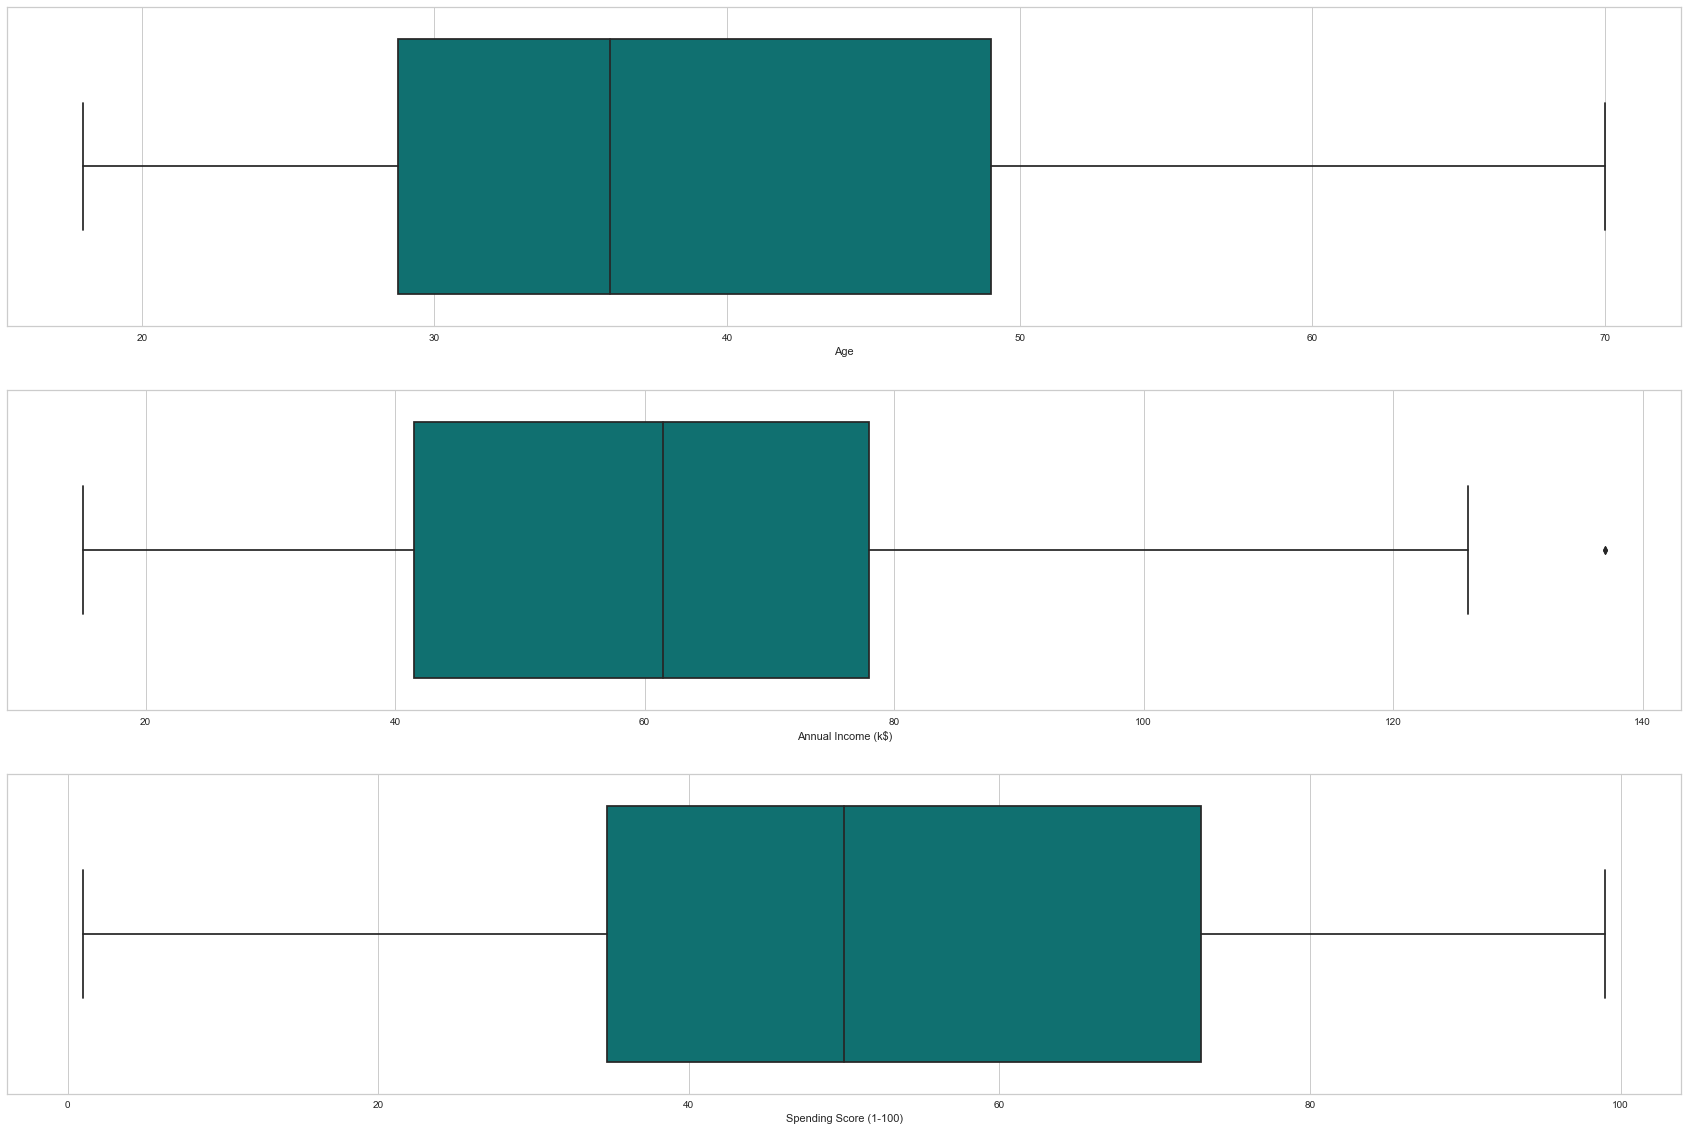

In [8]:
fig, ax = plt.subplots(3, 1, figsize=(30,20))

for i in range(len(df_num.columns)):
    sns.boxplot(x=df_num.columns[i], data=df_num, ax=ax[i], color = "teal")
plt.show()

In [9]:
# Estandarizaci칩n
scaler = StandardScaler()
var_transformadas = scaler.fit_transform(df_num)
df_copia[df_num.columns] = var_transformadas

In [10]:
df_copia.head()

Gender       Age  Annual Income (k$)  Spending Score (1-100)
CustomerID                                                              
1             Male -1.424569           -1.738999               -0.434801
2             Male -1.281035           -1.738999                1.195704
3           Female -1.352802           -1.700830               -1.715913
4           Female -1.137502           -1.700830                1.040418
5           Female -0.563369           -1.662660               -0.395980

## Encoding

Al igual que en todos los algoritmos que hemos aprendido hasta ahora las columnas de tipo categ칩rico deben ser codificadas, en este caso solo tenemos la columna de `Gender`, y vamos a aplicarle un `get_dummies` asumiendo que son variables que no tienen orden

In [11]:
df_copia = pd.get_dummies(df_copia, columns=["Gender"], prefix=["Gender"])
df_copia.head()

Age  Annual Income (k$)  Spending Score (1-100)  \
CustomerID                                                         
1          -1.424569           -1.738999               -0.434801   
2          -1.281035           -1.738999                1.195704   
3          -1.352802           -1.700830               -1.715913   
4          -1.137502           -1.700830                1.040418   
5          -0.563369           -1.662660               -0.395980   

            Gender_Female  Gender_Male  
CustomerID                              
1                   False         True  
2                   False         True  
3                    True        False  
4                    True        False  
5                    True        False

# K-Means Clustering 

Lo primero que tenemos que hacer es determinar el n칰mero de *clusters* que utilizaremos. Podremos usar dos aproximaciones: 

- Usando la `inercia`:  mide lo bien que un conjunto de datos fue agrupado por K-Means. Se calcula midiendo la distancia entre cada punto de datos y su centroide, elevando al cuadrado esta distancia y sumando estos cuadrados en un cl칰ster.

    Un buen modelo es el que tiene una baja inercia y un bajo n칰mero de clusters (K). Sin embargo, se trata de un compromiso, ya que a medida que K aumenta, la inercia disminuye.

    Para encontrar la K 칩ptima para un conjunto de datos, utilizaremos el m칠todo del codo; el cual encuentra el punto en el que la disminuci칩n de la inercia comienza a disminuir.
    

- Usando el `silhouette`:  indica la distancia entre los puntos de datos de un grupo y los de otro grupo. El rango de la puntuaci칩n de la silueta es de -1 a 1. La puntuaci칩n debe estar m치s cerca de 1 que de -1.

    - Cu치nto m치s cerca de 1 significa que el *cluster* est치 bien configurado, es decir, los datos dentro de un *cluster* son muy similares
    
    - Cu치nto m치s cerca de -1 significa que el *cluster* est치 mal configurado, es decir, los datos dentro del *cluster* son muy diferentes, lo que hace que los puntos est칠n m치s separados y, por lo tanto, m치s cerca estar치n los *clusters* 


## Selecci칩n n칰mero de clusters

### Usando `inercia`

In [12]:
# nos creamos una diccionario vac칤a para ir almacenando los valores de los scores del modelo
inercia = {}

# nos creamos una variable, que nos servir치 para simular distintos n칰meros de clusters
clusters = range(1,11)

#iniciamos el for para crear distintos modelos de cluster para sacar los scores de cada uno
for i in clusters:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_copia)
    
    inercia[f"{i} cluster"] = kmeans.inertia_
inercia


{'1 cluster': 698.56,
 '2 cluster': 487.6586341571178,
 '3 cluster': 393.60799469833046,
 '4 cluster': 303.28749417840714,
 '5 cluster': 266.2306501468962,
 '6 cluster': 230.01400227551895,
 '7 cluster': 210.5655641027376,
 '8 cluster': 187.09158574999702,
 '9 cluster': 167.69728553570383,
 '10 cluster': 149.32439981552199}

In [13]:
# convertimos el diccionario a dataframe

inercias_results = pd.DataFrame(inercia, index = [0]).T.reset_index()
inercias_results.columns = ["num_clus", "inercia"]
inercias_results

num_clus     inercia
0   1 cluster  698.560000
1   2 cluster  487.658634
2   3 cluster  393.607995
3   4 cluster  303.287494
4   5 cluster  266.230650
5   6 cluster  230.014002
6   7 cluster  210.565564
7   8 cluster  187.091586
8   9 cluster  167.697286
9  10 cluster  149.324400

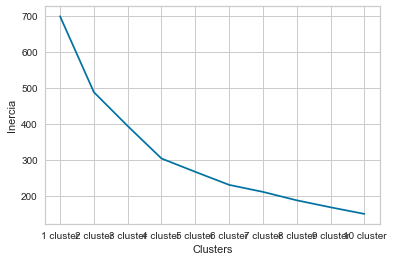

In [14]:
#plotemoas los resultados
sns.lineplot(data=inercias_results, x="num_clus", y="inercia")

#cambiamos las etiquetas de los ejes
plt.xlabel('Clusters')
plt.ylabel('Inercia')
plt.show();

### Usando silhouette score

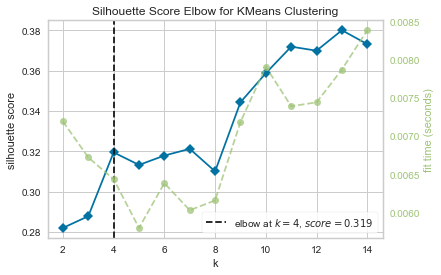

In [15]:
# iniciamos un modelo de Kmean
model = KMeans()

# llamamos al m칠todo KElbowVisualizer para que nos calcula el score de silhouette
visualizer = KElbowVisualizer(model, k=(2,15), metric='silhouette')

# fiteamos el modelo
visualizer.fit(df_copia)  

# visualizamos los resultados
visualizer.show();

游늷 En cualquiera de los casos, **parece que el mejor n칰mero de *clusters* es 4**

## Ejecuci칩n del modelo

In [16]:
#iniciamos el modelo
kmeans = KMeans(n_clusters=4)

#fitemos el modelo
km_fit = kmeans.fit(df_copia)


Veamos algunas caracter칤sticas del modelo: 

In [17]:
# los clusters que se han generado
labels = km_fit.labels_
labels

array([3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3,
       3, 2, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 2, 3, 3, 3, 2, 2, 2, 2, 3, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

In [18]:
# los centros de nuestros clusters

centroides = km_fit.cluster_centers_
centroides

array([[-0.42880597,  0.97484722,  1.21608539,  0.55      ,  0.45      ],
       [ 0.0768659 ,  0.9971462 , -1.22042727,  0.47368421,  0.52631579],
       [ 1.06297508, -0.4946758 , -0.37865953,  0.58461538,  0.41538462],
       [-0.96249203, -0.78476346,  0.39202966,  0.59649123,  0.40350877]])

### Calidad del cluster

- `Cardinalidad`: n칰mero de puntos por cluster


- `Magnitud`: la suma de las distancias al centroide dentro de cada plot


- `Relaci칩n Cardinalidad-Magnitud`: una mayor cardinalidad de los clusters tiende a dar lugar a una mayor magnitud de los mismos, lo que intuitivamente tiene sentido. Los clusters son an칩malos cuando la cardinalidad no se correlaciona con la magnitud en relaci칩n con los otros clusters.

KeyError: 'Cardinality'

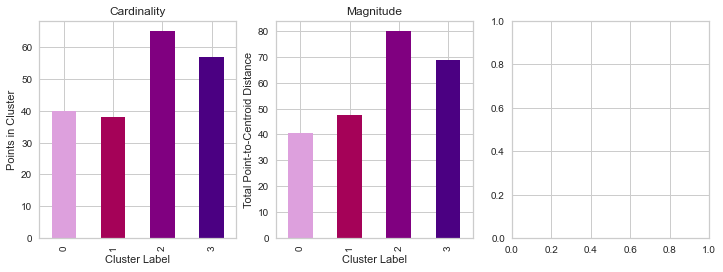

In [19]:
# definimos los colores de las gr치ficas
cluster_colors = ['plum', 'm', 'purple', 'indigo']

# iniciamos los subplots
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(12,4))

# ploteamos la CARDINALIDAD
plot_cluster_cardinality(labels, # las labels que predijo nuestro modelo
                         ax=ax1, # sobre que eje lo queremos hacer
                         title="Cardinality", # t칤tulo de la gr치fica
                         color=cluster_colors # colores que vamos a querer usar)
                            )

# ploteamos la MAGNITUD
plot_cluster_magnitude(df_copia, # el dataframe del que sacaremos los datos
                       labels, # las labels que predijo nuestro modelo
                       centroides, # los centroides de nuestros clusters
                       euclidean, # la distancia que quiero usar para medir
                       ax=ax2,
                       title="Magnitude",
                       color=cluster_colors)

# ploteamos la RELACI칍N ENTRE CARDINALIDAD Y MAGNITUD
plot_magnitude_vs_cardinality(df_copia,# el dataframe del que sacaremos los datos
                              labels, # las labels que predijo nuestro modelo
                              centroides, # los centroides de nuestros clusters
                              euclidean,# la distancia
                              color=cluster_colors,
                              ax=ax3, 
                              title="Magnitude vs. Cardinality")
plt.tight_layout()
plt.show()

### Entendiendo los clusters

In [ ]:
# a침adimos una nueva columna al DataFrame con las labels que se han creado previamente con el modelo de KMeans, FIJAOS QUE LO A칌ADIMOS AL ORIGINAL!!!!
df["Cluster"] = labels
df.head(2)

Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
CustomerID                                                                 
1            Male   19                  15                      39        2
2            Male   21                  15                      81        2

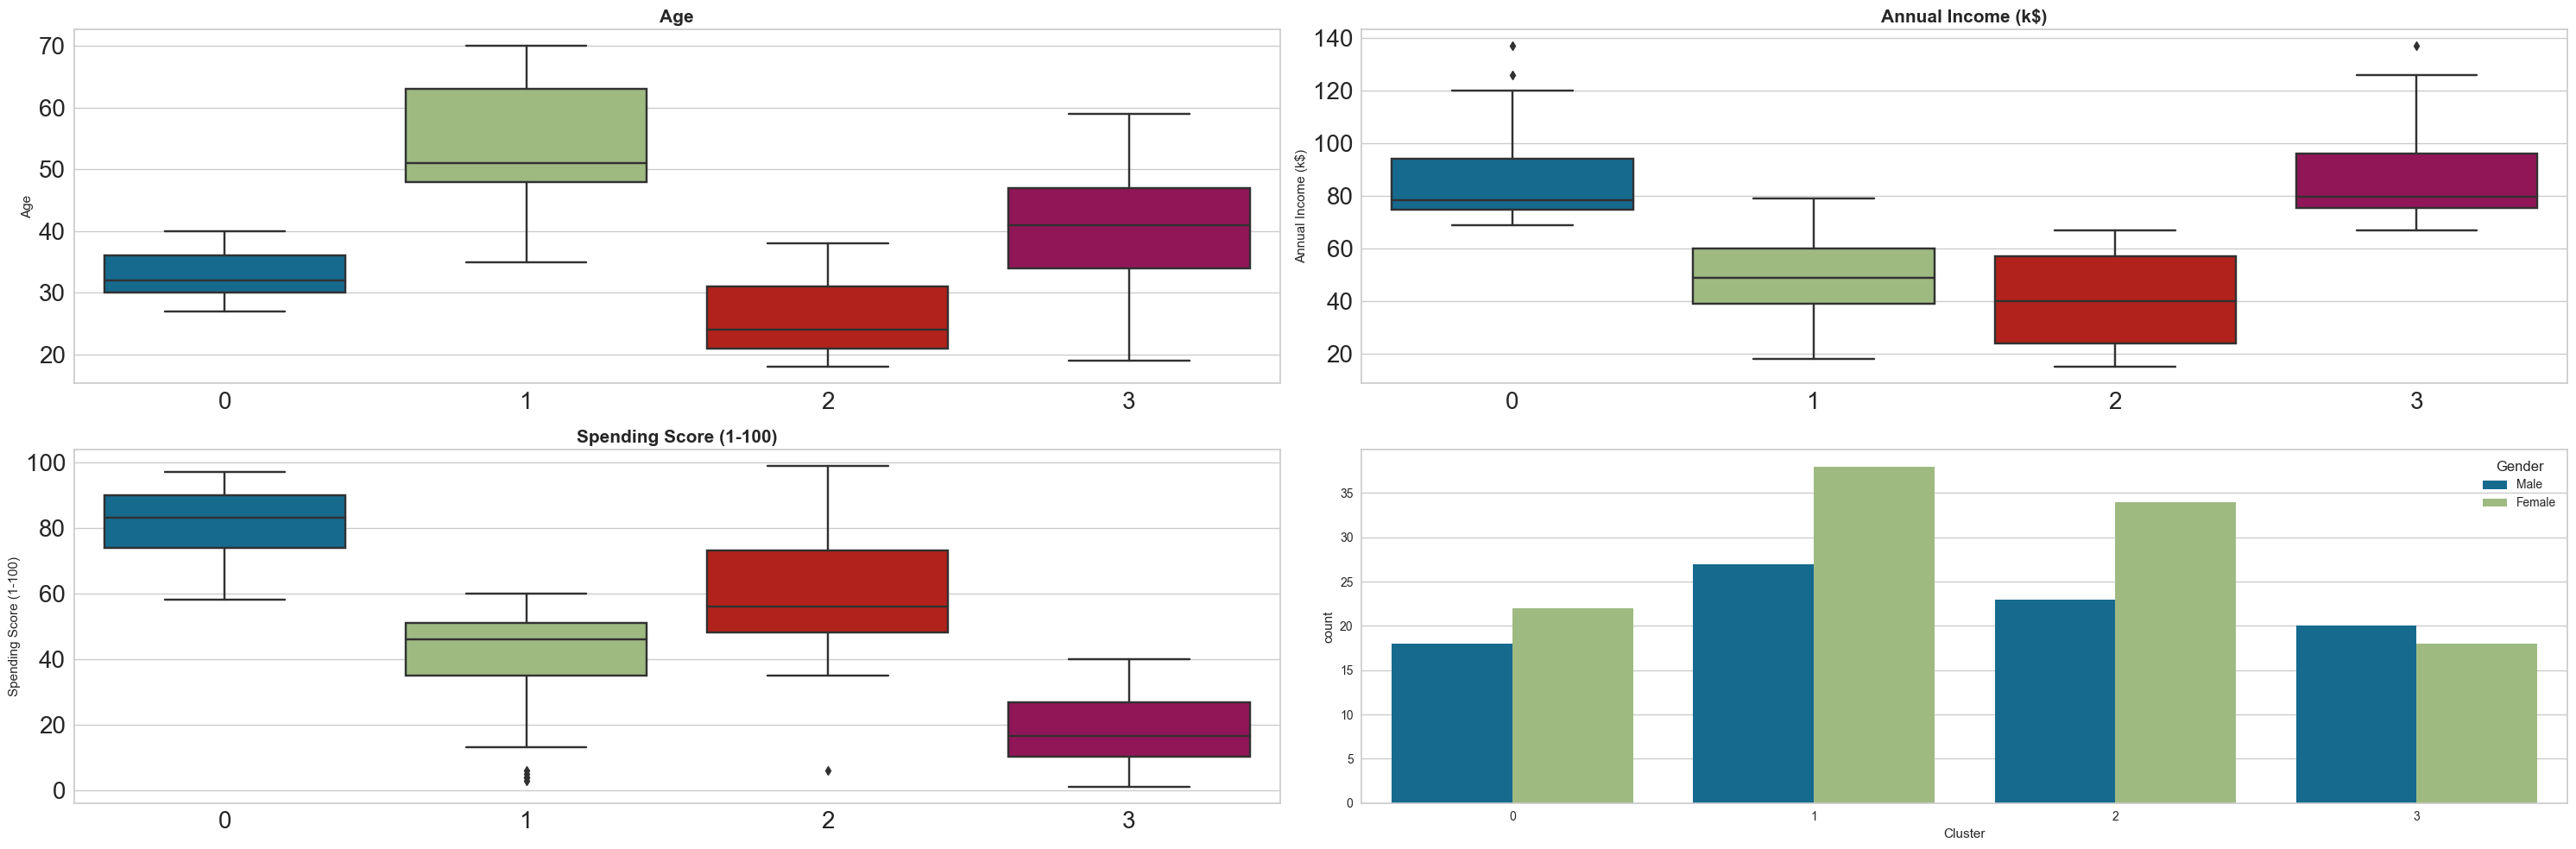

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 10))


axes = axes.flat

columnas = df.columns.drop(["Cluster", "Gender"])

for i, colum in enumerate(columnas): 
    sns.boxplot(
        data = df,
        x = 'Cluster',
        y = colum, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

# visualizamos los clusters en relaci칩n al g칠nero
sns.countplot(x = "Cluster", hue = "Gender", data = df, ax = axes[3])

fig.tight_layout();

Vale, hasta aqu칤, hemos entendido en que se caracterizan cada uno de nuestros clusters. Pero... como se relacionan entre ellas las variables

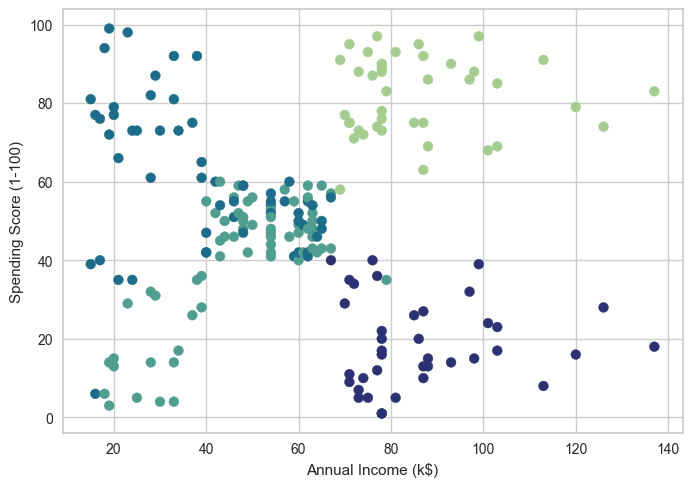

In [ ]:
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], c=df["Cluster"], s=50, cmap='crest')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show();

Si quisieramos ver como se relacionan entre si todas las variables ser칤a casi imposible, ya que no tenemos esa capacidad multidimensional. Para evitar estos problemas tenemos herramientas como el **PCA** o An치lisis de Componentes Principales. Veamos como funciona

#### PCA

Un PCA es un m칠todo estad칤stico que permite simplificar la complejidad de espacios muestrales con muchas dimensiones a la vez que conserva su informaci칩n. 


Una forma intuitiva de entender el proceso de PCA consiste en interpretar las componentes principales desde un punto de vista geom칠trico usando un PCA. Este es una t칠cnica de reducci칩n de dimensionalidad que se utiliza com칰nmente en el aprendizaje autom치tico no supervisado, como en el contexto de un problema donde se ha aplicado el algoritmo K-Means. Es importante por varias razones:

1. **Reducci칩n de la dimensionalidad:** En muchos conjuntos de datos, especialmente aquellos con muchas caracter칤sticas (dimensiones), puede haber redundancia de informaci칩n o caracter칤sticas irrelevantes. PCA permite reducir la dimensionalidad del conjunto de datos proyectando las caracter칤sticas originales en un nuevo conjunto de caracter칤sticas (los componentes principales) que capturan la mayor cantidad de varianza en los datos. Esto simplifica el problema al eliminar caracter칤sticas menos informativas y reduce la complejidad computacional.

2. **Mejora de la visualizaci칩n:** PCA puede utilizarse para visualizar datos en un espacio de menor dimensionalidad. Al proyectar los datos en un espacio bidimensional o tridimensional, por ejemplo, es m치s f치cil representar gr치ficamente los cl칰steres y las relaciones entre puntos de datos. Esto ayuda en la interpretaci칩n y evaluaci칩n de los resultados de K-Means, ya que permite visualizar c칩mo los cl칰steres se distribuyen en el espacio reducido.

3. **Eliminaci칩n de la multicolinealidad:** En muchos casos, las caracter칤sticas en un conjunto de datos est치n correlacionadas entre s칤, lo que puede dificultar la interpretaci칩n de los resultados de K-Means. PCA puede ayudar a reducir la multicolinealidad al extraer componentes principales no correlacionados, lo que mejora la interpretaci칩n de los cl칰steres resultantes.

4. **Mejora de la eficiencia del modelo:** Al reducir la dimensionalidad de los datos, PCA puede ayudar a acelerar el rendimiento de algoritmos de aprendizaje autom치tico, incluido K-Means. Los modelos entrenados en datos de menor dimensionalidad a menudo son m치s eficientes en t칠rminos de tiempo de entrenamiento y uso de recursos computacionales.

5. **Mejora de la calidad del clustering:** PCA puede ayudar a mejorar la calidad del clustering al reducir el ruido y la varianza en los datos. Al eliminar caracter칤sticas menos informativas, K-Means puede centrarse en las caracter칤sticas m치s relevantes para encontrar cl칰steres m치s significativos y coherentes.

Visualmente ser칤a algo as칤:

![pca](https://github.com/Ironhack-Part-Time-Enero2022/apuntes-clases/blob/master/semana-19/imagenes/pca.png?raw=true)

La segunda componente (Z2) sigue la segunda direcci칩n en la que los datos muestran mayor varianza y que no est치 correlacionada con la primera componente. La condici칩n de no correlaci칩n entre componentes principales equivale a decir que sus direcciones son perpendiculares/ortogonales.

![pca2](https://github.com/Ironhack-Part-Time-Enero2022/apuntes-clases/blob/master/semana-19/imagenes/pca2.png?raw=true)



游늷 **NOTA** El proceso de PCA identifica aquellas direcciones en las que la varianza es mayor. Como la varianza de una variable se mide en su misma escala elevada al cuadrado, si antes de calcular las componentes no se estandarizan todas las variables para que tengan media 0 y desviaci칩n est치ndar 1, aquellas variables cuya escala sea mayor dominar치n al resto. De ah칤 que sea recomendable estandarizar siempre los datos.

In [ ]:
# lo primero que vamos a hacer es a침adir a el DataFrame que hemos estado usando para hacer el modelo la variable de "cluster"
df_copia["Cluster"] = labels

#iniciamos el m칠todo de PCA indicando el n칰mero de dimensiones quq queremos
pca = PCA(2)

# ajustamos el PCA
data_transformed = pd.DataFrame(pca.fit_transform(df_copia), columns=["PC1","PC2"])
data_transformed.head()

PC1       PC2
0  0.494660 -1.476542
1 -0.652405 -1.598503
2  1.364601 -1.288540
3 -0.580244 -1.518698
4  0.575831 -0.794568

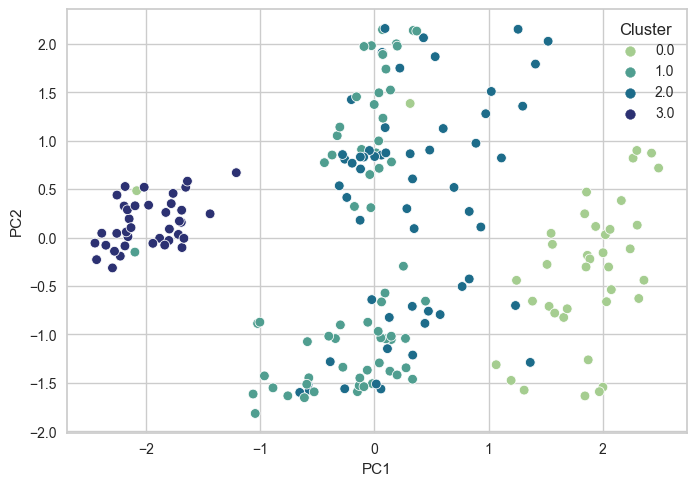

In [ ]:
# veamos gr치ficamente los datos
pca_plot = sns.scatterplot(x = data_transformed["PC1"], y = data_transformed["PC2"], hue= df_copia["Cluster"], palette= "crest");

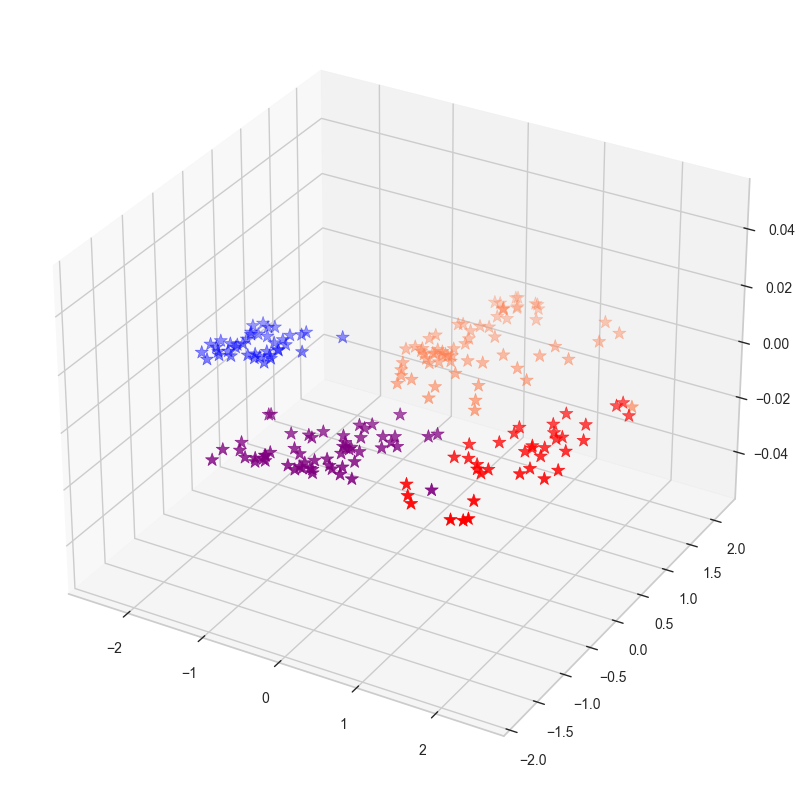

In [ ]:

mapa = {0:"red", 
       1: "coral", 
       2: "blue", 
       3: "purple", 
       4: "mediumseagreen", 
       5: "darkorange"}
col = df["Cluster"].map(mapa)
# pogamosnolo en tres dimensiones
fig = plt.figure(figsize = (10,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_transformed["PC1"], data_transformed["PC2"], c = col, cmap='crest', s = 100, marker = "*", linewidth=0.5);